<a href="https://colab.research.google.com/github/Likelipop/03-IML/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Dataset

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [39]:
!git clone "https://github.com/Likelipop/03-IML.git"

fatal: destination path '03-IML' already exists and is not an empty directory.


In [201]:
import os
cur_path = os.getcwd()
PATH = os.path.join(cur_path, "03-IML/TravelInsurancePrediction.csv")

df = pd.read_csv(PATH)
df.head()
# ToDo: Show histogram of dataframe


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Data Analysis

<h3>1. Data Visualization</h3>

<h3> Numeirc columns </h3>

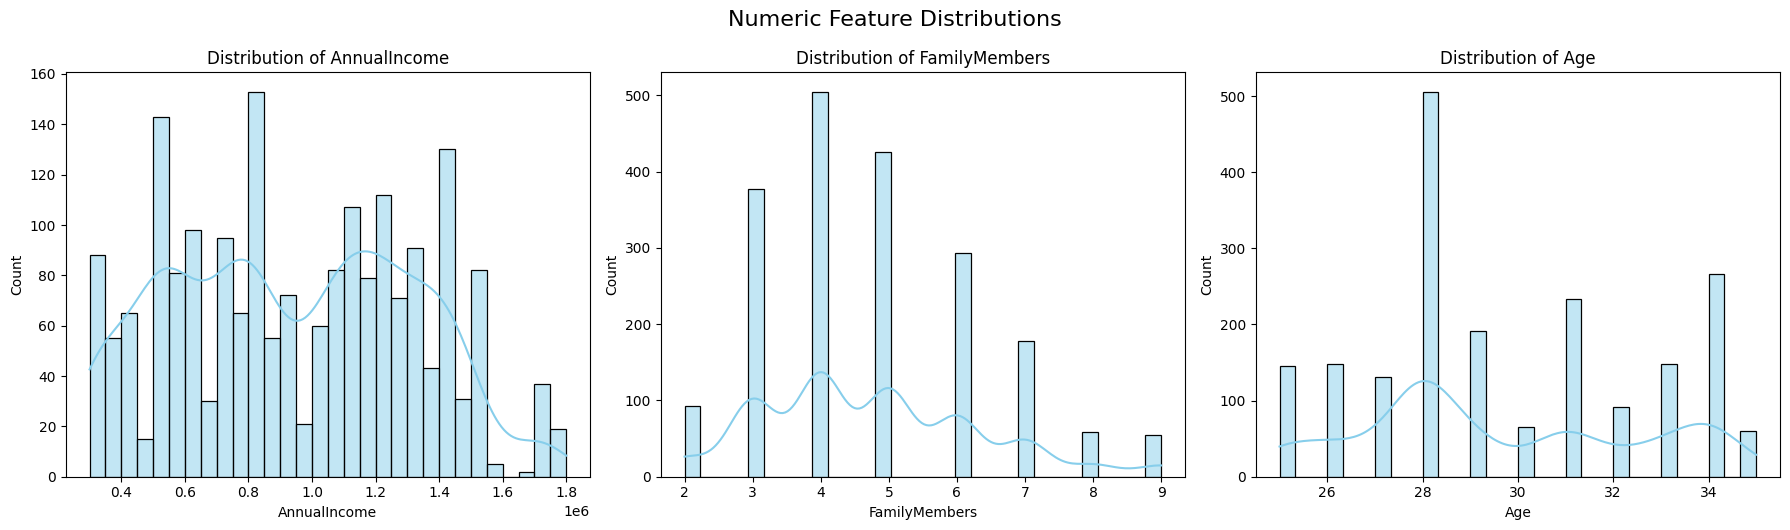

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

column_histplot = ['AnnualIncome', 'FamilyMembers', 'Age']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, column in enumerate(column_histplot):
    sns.histplot(
        data=df,
        x=column,
        ax=axes[i],
        kde=True,                # Add KDE line for smooth curve
        color='skyblue',
        bins=30
    )
    axes[i].set_title(f'Distribution of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)

plt.tight_layout()
plt.suptitle("Numeric Feature Distributions", fontsize=16, y=1.05)
plt.show()


from the observed figures, we can deduce that most of customer was young person whose age ranging from above 25 and above 35, and a sufficient income.  

<h3>Box plot for numeic column </h3>

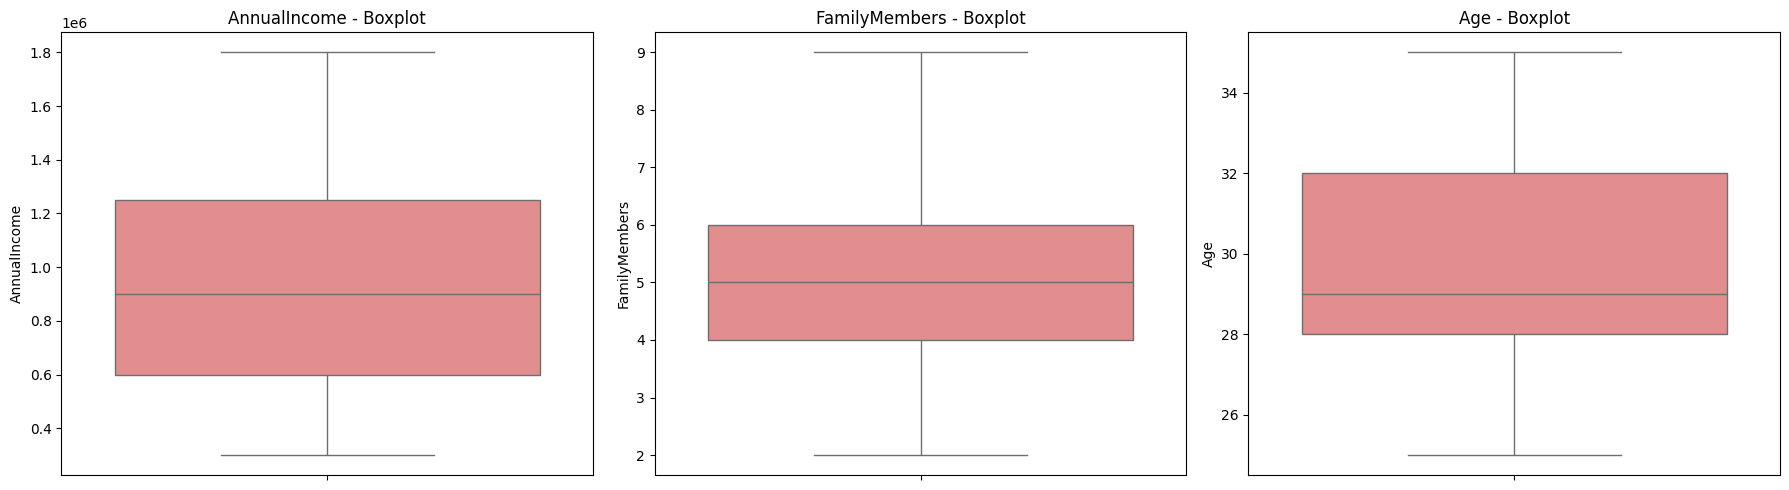

In [206]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, column in enumerate(column_histplot):
    sns.boxplot(y=df[column], ax=axes[i], color="lightcoral")
    axes[i].set_title(f'{column} - Boxplot')
plt.tight_layout()


Good! there is no outliers at all, lets take a look at categorical columns

<h4>2.Binary columns </h4>

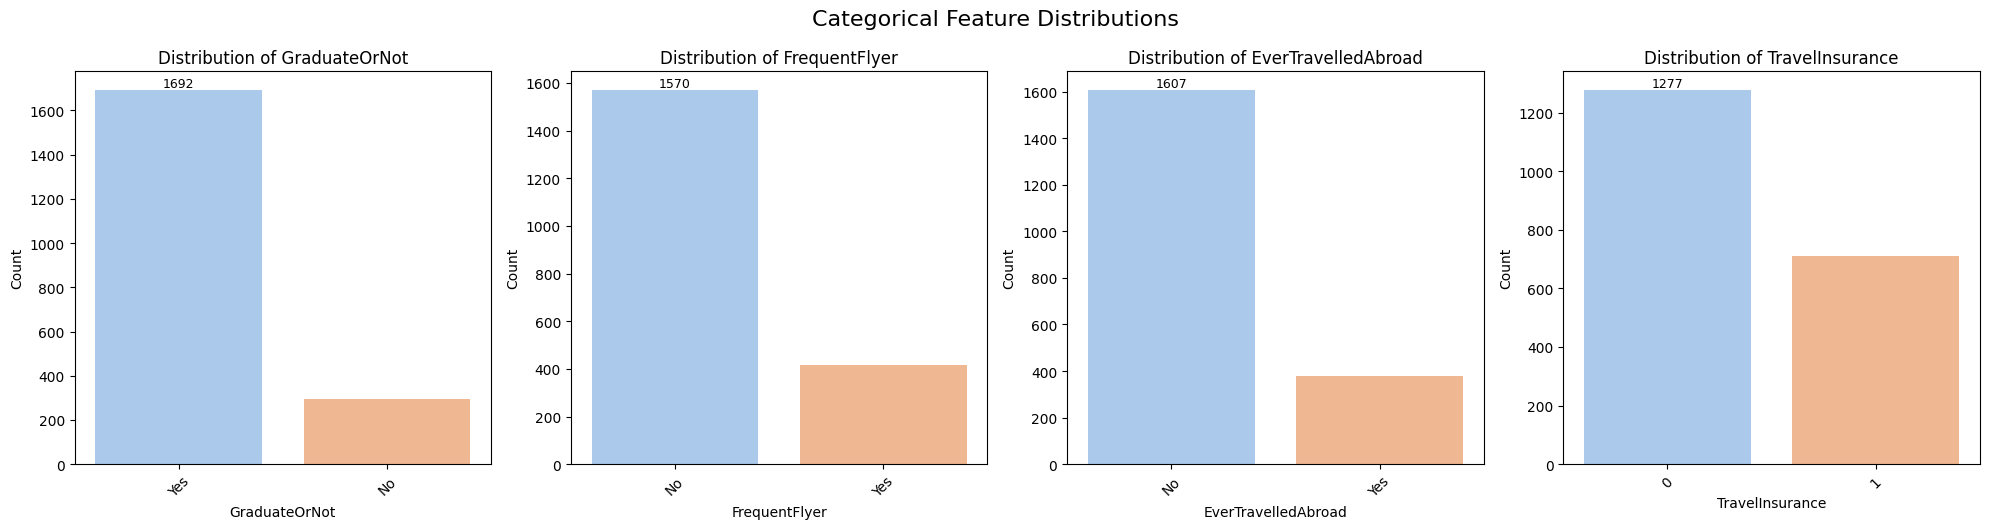

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

column_barplot = ['GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, column in enumerate(column_barplot):
    sns.countplot(
        x=column,
        hue=column,               # Assign hue to match x
        data=df,
        ax=axes[i],
        palette='pastel',
        legend=False              # Avoid legend repetition
    )
    axes[i].set_title(f'Distribution of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].bar_label(axes[i].containers[0], fontsize=9)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("Categorical Feature Distributions", fontsize=16, y=1.05)
plt.show()


The figure illustrating the distribution of categorical features related to travel behavior and insurance decisions:

GraduateOrNot: The majority of individuals in the dataset are **graduates**, with a significantly smaller number of non-graduates.

FrequentFlyer: Most individuals are **not frequent flyers**, indicating limited regular air travel among the population.

EverTravelledAbroad: A large portion of people have **never traveled abroad**, while a smaller group has some international travel experience.

TravelInsurance: More people **do not have travel insurance** (represented by 0) compared to those who do (1), showing a potential area for insurance outreach or marketing.

Overall, the graphs suggest that the dataset includes mostly domestic, non-frequent travelers, many of whom are educated but do not currently own travel insurance.

## Preprocessing

In [129]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.dropna()
    df = df.drop_duplicates()

    return df

In [130]:
df = preprocessing_data(df.copy())

In [131]:
# drop nonsense features
df = df.drop(columns = ["Unnamed: 0"])

In [132]:
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


## Feature Engineering

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def apply_feature_engineering(df):
    """
    Objective : turn those shaky hacky values into number
    input :
      df : dataframe
    output :
      dataframe with numeric features transformed
    """

    df = pd.get_dummies(df, columns=['GraduateOrNot','FrequentFlyer','EverTravelledAbroad',"Employment Type"], drop_first=True, dtype = int)
    return df

df = apply_feature_engineering(df)



In [134]:
df.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes,Employment Type_Private Sector/Self Employed
0,31,400000,6,1,0,1,0,0,0
1,31,1250000,7,0,0,1,0,0,1
2,34,500000,4,1,1,1,0,0,1
3,28,700000,3,1,0,1,0,0,1
4,28,700000,8,1,0,1,1,0,1


In [142]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Correctly exclude the target column
    X = df.drop(columns=['TravelInsurance'])
    y = df['TravelInsurance']
    return X, y

X, y = prepare_X_y(df)


In [143]:
y = y.apply(lambda x: int (x+0.1))

In [144]:
X

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes,Employment Type_Private Sector/Self Employed
0,31,400000,6,1,1,0,0,0
1,31,1250000,7,0,1,0,0,1
2,34,500000,4,1,1,0,0,1
3,28,700000,3,1,1,0,0,1
4,28,700000,8,1,1,1,0,1
...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,1,1,1,1
1983,28,1750000,5,1,1,0,1,1
1984,28,1150000,6,1,1,0,0,1
1985,34,1000000,6,0,1,1,1,1


# Apply machine learning model

## Train-test split

In [212]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.9

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

For the ease of visluazation at the end of given methods, i store the F1 score ínide the logging_score list

In [213]:
logging_score = []

**Before using PCA**

In [214]:
from sklearn.metrics import classification_report, precision_score, f1_score, recall_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
import numpy as np


def build_model(X, y):
    """
    Builds and trains a classification model using Gaussian Naive Bayes and MinMaxScaler.
    It performs hyperparameter tuning with GridSearchCV.

    :param X: Feature matrix
    :param y: Target labels
    :return: Trained model (best estimator)
    """
    # Create pipeline
    pipeline = Pipeline([
        ("scaler", MinMaxScaler()),
        ("classifier", GaussianNB())
    ])

    # Define parameter grid
    var_smoothing_values = np.logspace(-9, -4, num=100)
    param_grid = {
        "scaler__feature_range": [(0, 1), (-1, 1)],
        "classifier__var_smoothing": var_smoothing_values
    }


    # Grid search with cross-validation
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )

    grid_search.fit(X, y)

    print("Best parameters found:", grid_search.best_params_)
    return grid_search.best_estimator_


def calculate_performance(y_true, y_pred, average='binary'):
    """
    Evaluates model predictions with standard classification metrics.

    :param y_true: Ground truth labels
    :param y_pred: Predicted labels
    :param average: Averaging method for multiclass support
    :return: Main score (F1)
    """
    precision = precision_score(y_true, y_pred, average=average)
    recall = recall_score(y_true, y_pred, average=average)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average=average)

    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    try:
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred))
    except Exception as e:
        print("Could not generate classification report:", e)

    return f1


# Usage
model = build_model(trainX, trainY)
pred = model.predict(testX)
main_score = calculate_performance(testY, pred)

logging_score.append(main_score)


Best parameters found: {'classifier__var_smoothing': np.float64(1e-09), 'scaler__feature_range': (0, 1)}
Precision: 0.6545
Recall:    0.5625
Accuracy:  0.7638
F1 Score:  0.6050

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       135
           1       0.65      0.56      0.61        64

    accuracy                           0.76       199
   macro avg       0.73      0.71      0.72       199
weighted avg       0.76      0.76      0.76       199



**After using PCA**

In [215]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def build_model(X, y):
    """
    Builds and trains a classification model using Gaussian Naive Bayes, MinMaxScaler, and PCA.
    It performs hyperparameter tuning with GridSearchCV.
    """
    pipeline = Pipeline([
        ("scaler", MinMaxScaler()),
        ("pca", PCA()),
        ("classifier", GaussianNB())
    ])

    var_smoothing_values = np.logspace(-9, -4, num=10)  # Reduced for speed
    n_components = [1, 2, 3,4,5,0.95, 0.99, None]  # Keep 95% or 99% variance, or use all components

    param_grid = {
        "scaler__feature_range": [(0, 1)],
        "pca__n_components": n_components,
        "classifier__var_smoothing": var_smoothing_values
    }

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X, y)

    print("Best parameters found:", grid_search.best_params_)
    return grid_search.best_estimator_

# Usage
model = build_model(trainX, trainY)
pred = model.predict(testX)
main_score = calculate_performance(testY, pred)

logging_score.append(main_score)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters found: {'classifier__var_smoothing': np.float64(1e-09), 'pca__n_components': 0.99, 'scaler__feature_range': (0, 1)}
Precision: 0.8333
Recall:    0.5469
Accuracy:  0.8191
F1 Score:  0.6604

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       135
           1       0.83      0.55      0.66        64

    accuracy                           0.82       199
   macro avg       0.82      0.75      0.77       199
weighted avg       0.82      0.82      0.81       199



**Mixed Naive Bayes**

In [161]:
pip install git+https://github.com/remykarem/mixed-naive-bayes.git


  Cloning https://github.com/remykarem/mixed-naive-bayes.git to /tmp/pip-req-build-8qk2fmcf
  Running command git clone --filter=blob:none --quiet https://github.com/remykarem/mixed-naive-bayes.git /tmp/pip-req-build-8qk2fmcf
  Resolved https://github.com/remykarem/mixed-naive-bayes.git to commit 6d90de8adf75dbef032ad51029ad3782190ec577
  Preparing metadata (setup.py) ... done
  Created wheel for mixed-naive-bayes: filename=mixed_naive_bayes-0.0.4-py3-none-any.whl size=10860 sha256=b1027f02631231e290ce16530032b18801195c9fd09332ae02459b79797a87a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-p4g22cf4/wheels/d1/9c/ff/c03e34ea00dee4276f959981cec26467aa154c994562300bd5
Successfully built mixed-naive-bayes


In [216]:
categorical_features = []
df1 = df.drop(columns = 'TravelInsurance')
for i,col in enumerate(df1.columns):
    unique_vals = df1[col].unique()
    if set(unique_vals) <= {0, 1} and len(unique_vals) == 2:
        categorical_features.append(i)


In [217]:
categorical_features

[6]

In [181]:
df.shape

(1987, 9)

In [218]:
from mixed_naive_bayes import MixedNB
from sklearn.preprocessing import MinMaxScaler
# Get indices of categorical features

model = MixedNB(
    categorical_features=categorical_features,  # Pass indices instead of names
    alpha=1.0
)

scaler = MinMaxScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

model.fit(trainX, trainY)
y_pred = model.predict(testX)
main_score = calculate_performance(testY, y_pred)
logging_score.append(main_score)

Precision: 0.6000
Recall:    0.5625
Accuracy:  0.7387
F1 Score:  0.5806

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       135
           1       0.60      0.56      0.58        64

    accuracy                           0.74       199
   macro avg       0.70      0.69      0.70       199
weighted avg       0.73      0.74      0.74       199



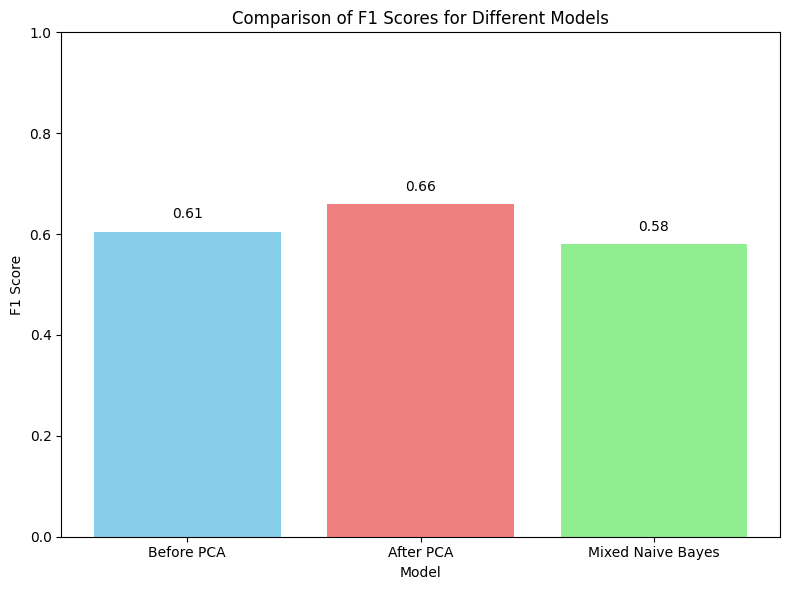

In [219]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['Before PCA', 'After PCA', 'Mixed Naive Bayes']

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, logging_score, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Comparison of F1 Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

for i, score in enumerate(logging_score):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [209]:
def get_conclusion():
    return """
    For travel insurance, accuracy in predicting claims is crucial.
    The model uses F1 score to balance precision and recall. Both dimensional reduction and GaussianNB was applied.
    The model performed well but could improve with further tuning for better claim prediction accuracy.
    """


In [211]:
print(get_conclusion())


    For travel insurance, accuracy in predicting claims is crucial. 
    The model uses F1 score to balance precision and recall. Both dimensional reduction and GaussianNB was applied. 
    The model performed well but could improve with further tuning for better claim prediction accuracy.
    
